# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


The following command must be run outside of the IPython shell:

    $ pip install citipy 

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 2 of set 0 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 3 of set 0 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 4 of set 0 | edea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 5 of set 0 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
City not found!
Processing record 6 of set 0 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 7 of set 0 | nanortalik
http://api.openweather

Processing record 8 of set 1 | takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 9 of set 1 | point fortin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 10 of set 1 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 11 of set 1 | nanakuli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 12 of set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 13 of set 1 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 14 of set 1 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5

Processing record 15 of set 2 | shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 16 of set 2 | kyaikkami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 17 of set 2 | safford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 18 of set 2 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 19 of set 2 | shulan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 20 of set 2 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 21 of set 2 | kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing reco

Processing record 23 of set 3 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 24 of set 3 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 25 of set 3 | shubarkuduk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 26 of set 3 | mikuni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 27 of set 3 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 28 of set 3 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 29 of set 3 | edson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785

Processing record 31 of set 4 | santa cruz cabralia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 32 of set 4 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 33 of set 4 | swellendam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 34 of set 4 | west bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 35 of set 4 | ouango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 36 of set 4 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 37 of set 4 | aksha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef

Processing record 39 of set 5 | el pueblito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 40 of set 5 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 41 of set 5 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 42 of set 5 | kargopol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 43 of set 5 | milkovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 44 of set 5 | noyabrsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 45 of set 5 | zhanatas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
C

Processing record 46 of set 6 | biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 47 of set 6 | harbour breton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 48 of set 6 | hendijan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
City not found!
Processing record 49 of set 6 | maghama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
City not found!
Processing record 50 of set 6 | siwana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 0 of set 7 | aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 1 of set 7 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9

Processing record 1 of set 8 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 2 of set 8 | lanxi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 3 of set 8 | salta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 4 of set 8 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 5 of set 8 | kimbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 6 of set 8 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 7 of set 8 | letnyaya stavka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing reco

Processing record 9 of set 9 | anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 10 of set 9 | nagato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 11 of set 9 | chunhuhub
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 12 of set 9 | hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 13 of set 9 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
City not found!
Processing record 14 of set 9 | buchanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 15 of set 9 | clayton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4e

Processing record 16 of set 10 | khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 17 of set 10 | marquette
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 18 of set 10 | mufumbwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 19 of set 10 | buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 20 of set 10 | wewak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 21 of set 10 | roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 22 of set 10 | springdale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processin

Processing record 23 of set 11 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 24 of set 11 | la palma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 25 of set 11 | kamakhyanagar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 26 of set 11 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 27 of set 11 | cabo rojo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 28 of set 11 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd284d4ef5
Processing record 29 of set 11 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eec44fb1c9f65541785d5dd

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Temp          560
Lat           560
Lng           560
Wind Speed    560
dtype: int64

In [5]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,albany,95,US,1594941672,58,75.00,42.60,-73.97,1.01
1,mataura,16,NZ,1594941672,83,39.00,-46.19,168.86,3.00
2,praia da vitoria,75,PT,1594941672,82,68.00,38.73,-27.07,10.80
3,edea,75,CM,1594941672,100,75.20,3.80,10.13,3.36
4,airai,0,TL,1594941672,84,59.23,-8.93,125.41,2.91


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data.describe()

,Cloudiness,Date,Humidity,Temp,Lat,Lng,Wind Speed
count,560.000000,5.600000e+02,560.000000,560.000000,560.000000,560.000000,560.000000
mean,51.930357,1.594942e+09,72.192857,68.441857,19.875786,21.693071,7.273946
std,37.267161,6.408493e+01,20.447374,14.650664,32.629671,90.448197,5.051328
min,0.000000,1.594941e+09,3.000000,28.400000,-54.800000,-175.200000,0.160000
25%,15.000000,1.594942e+09,62.000000,57.200000,-5.422500,-56.502500,3.415000
50%,60.500000,1.594942e+09,77.000000,71.035000,22.140000,24.545000,5.820000
75%,89.250000,1.594942e+09,87.000000,79.917500,46.930000,105.587500,10.275000
max,100.000000,1.594942e+09,100.000000,109.990000,78.220000,179.320000,30.000000


In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_data_df = weather_data.loc[weather_data["Humidity"] > 100, [
    "City", "Lat", "Lng", "Humidity"]]
weather_data_df.head()

,City,Lat,Lng,Humidity


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [22]:
# Extract relevant fields from the data frame

cities_list = zip(cloudiness,country,date,humidity,temp,lat,lng)
# Set variable for output file
output_data_file = "output_data/cities.csv"
#  Open the output file
with open(output_data_file, 'w') as datafile:
    weather_data.to_csv(output_data_file)



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

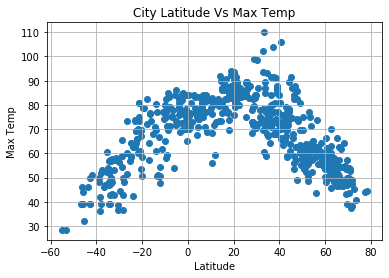

In [26]:
plt.scatter(weather_data['Lat'],weather_data['Temp'])
#weather_data.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude Vs Max Temperature",grid = True)
plt.title('City Latitude Vs Max Temp' )
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()
# save the figure 
plt.savefig("output_data/Max_Temp_vs_Latitude.png")

# Display the plot 
plt.show()

## Latitude vs. Humidity Plot

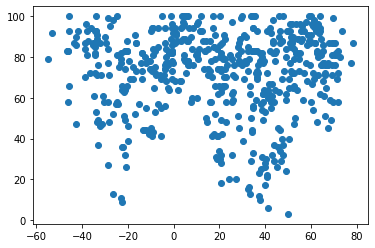

In [25]:
plt.scatter(weather_data['Lat'],weather_data['Humidity'])
#weather_data.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude Vs Max Temperature",grid = True)

# save the figure 
plt.savefig("output_data/Latitude vs Humidity.png")

# Display the plot 
plt.show()

## Latitude vs. Cloudiness Plot

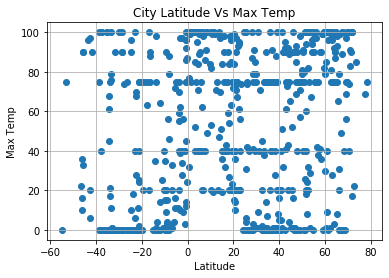

In [27]:
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'])
#weather_data.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude Vs Max Temperature",grid = True)
plt.title('City Latitude Vs Max Temp' )
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()
# save the figure 
plt.savefig("output_data/Cloudiness vs_Latitude.png")

# Display the plot 
plt.show()

## Latitude vs. Wind Speed Plot

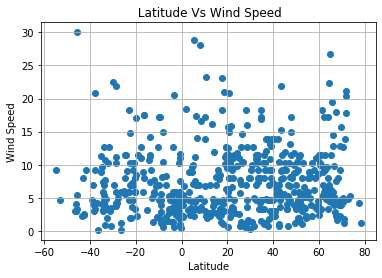

In [28]:
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'])
#weather_data.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude Vs Max Temperature",grid = True)
plt.title(' Latitude Vs Wind Speed' )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
# save the figure 
plt.savefig("output_data/Wind Speed vs_Latitude.png")

# Display the plot 
plt.show()

## Linear Regression

In [40]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    
    plt.show()

In [41]:
# Create Northern and Southern Hemisphere DataFrames
#northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
#southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]
nothern = weather_data.loc[weather_data["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = weather_data[weather_data["Lat"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7288613488533653


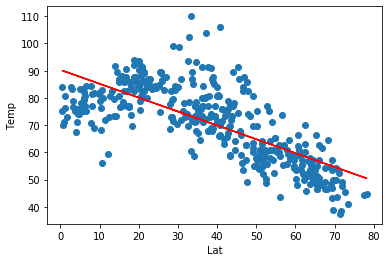

<Figure size 432x288 with 0 Axes>

In [44]:
xlbl = "Lat"
ylbl = "Temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)
# Save the figure

plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8244008398595436


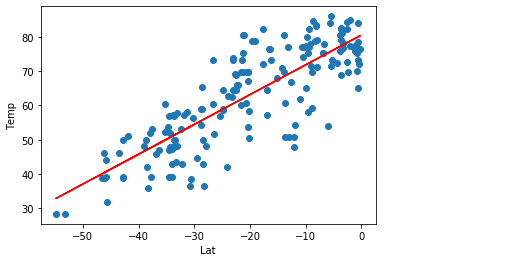

<Figure size 432x288 with 0 Axes>

In [45]:
xlbl = "Lat"
ylbl = "Temp"
lblpos = (0,25)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,5)
# Save the figure

plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.025833415634747302


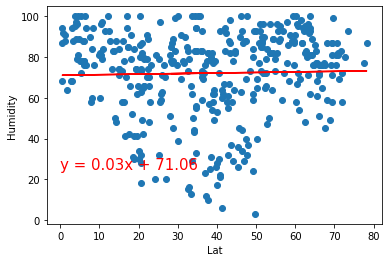

<Figure size 432x288 with 0 Axes>

In [46]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)
# Save the figure

plt.savefig("output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.04276771913059728


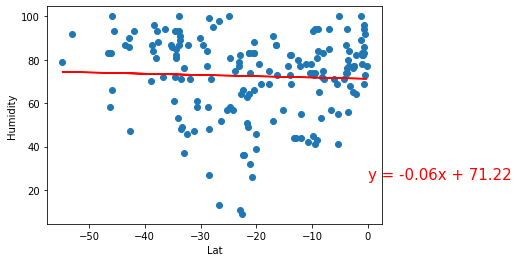

<Figure size 432x288 with 0 Axes>

In [47]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (0,25)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,5)
# Save the figure

plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00686728238790643


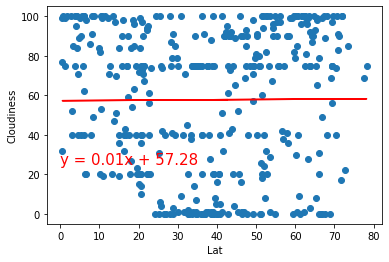

<Figure size 432x288 with 0 Axes>

In [48]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)
# Save the figure

plt.savefig("output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.037401122948042806


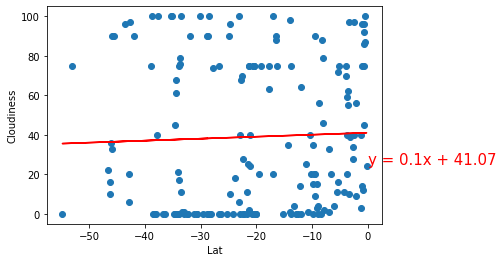

<Figure size 432x288 with 0 Axes>

In [49]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (0,25)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,5)
# Save the figure

plt.savefig("output_data/southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.004939006720090999


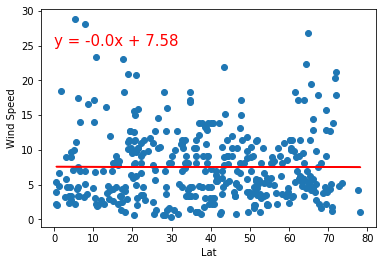

<Figure size 432x288 with 0 Axes>

In [51]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)
# Save the figure

plt.savefig("output_data/Northern Hemisphere - Windspeed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.07937343369623698


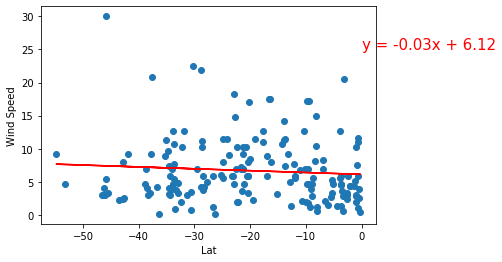

<Figure size 432x288 with 0 Axes>

In [50]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,25)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,5)
# Save the figure

plt.savefig("output_data/southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")